## Topic Modeling Regression Discontinuity 

Here we do a regression discontinuity analysis on our topic modeling tasks. We have assigned each document its most likely topic and then binned all of the documents by week, finding the counts per week of each topic. We then turn each count into a proportion per week in order to normalize. We now perform a regression discontinuity per topic. Three topics were chosen because we found that the coherence score was the highest for 3 topics. 

In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from pytz import timezone
import time
from datetime import datetime

In [2]:
df = pd.read_csv('Proportion_of_Topics2.csv')

In [3]:
df.columns = ['timestamps', 'topic_0', 'topic_1', 'topic_2']
df.head()

,timestamps,topic_0,topic_1,topic_2
0,2016-01-03,0.527629,0.379701,0.092671
1,2016-01-10,0.507552,0.403644,0.088804
2,2016-01-17,0.501622,0.406242,0.092136
3,2016-01-24,0.492569,0.420300,0.087131
4,2016-01-31,0.493305,0.422299,0.084396


In [4]:
def create_dummy(row):
    """Function for creating the dummy variable"""
    if row < datetime(2017, 1, 1):
        return 0
    else:
        return 1

In [5]:
df.timestamps = pd.to_datetime(df.timestamps)
df['Ordinal_Timestamps']=df['timestamps'].map(datetime.toordinal)
df['dummy'] = df.timestamps.apply(create_dummy)

In [6]:
def regression_discontinuity(x, y, dummy, df, discontinuity_point):
    """Function that generates both the regression statistics and the plotting
            x= the time variable we want to use (in this case week)
            y = the output variable (in this case the network statistic)
            dummy = the dummy variable created
            df = the data frame
            discontinuity_point = here we want the week that the change occurred 
    """
    
    #regression
    result = smf.ols('{} ~  + {}  + {}'.format(y, x, dummy), data = df).fit()
    print(result.summary())
    
    #plotting
    plt.scatter(df[x], df[y])
    l=df[df[x]<discontinuity_point][x].count()
    plt.plot(df[x][0:l], result.predict()[0:l], '-', color="r")
    plt.plot(df[x][l:], result.predict()[l:], '-', color="r")
    plt.axvline(x=discontinuity_point,color="black", linestyle="--")
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                topic_0   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.1303
Date:                Wed, 03 Apr 2019   Prob (F-statistic):              0.878
Time:                        21:03:43   Log-Likelihood:                 191.01
No. Observations:                  88   AIC:                            -376.0
Df Residuals:                      85   BIC:                            -368.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.5337     23

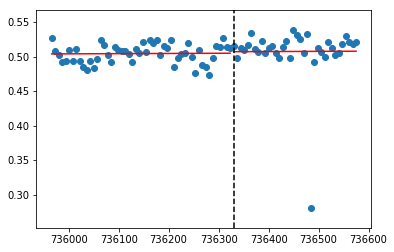

In [8]:
regression_discontinuity(x = 'Ordinal_Timestamps', y = 'topic_0', dummy = 'dummy', df = df, 
                         discontinuity_point=datetime.toordinal(datetime(2017, 1, 1)))

                            OLS Regression Results                            
Dep. Variable:                topic_1   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     4.198
Date:                Wed, 03 Apr 2019   Prob (F-statistic):             0.0183
Time:                        21:18:16   Log-Likelihood:                 208.42
No. Observations:                  88   AIC:                            -410.8
Df Residuals:                      85   BIC:                            -403.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             24.7075     19

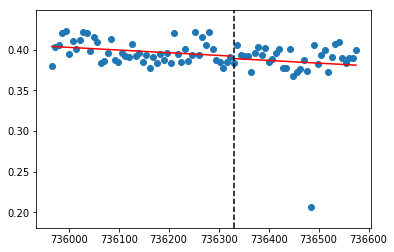

In [9]:
regression_discontinuity(x = 'Ordinal_Timestamps', y = 'topic_1', dummy = 'dummy', df = df, 
                         discontinuity_point=datetime.toordinal(datetime(2017, 1, 1)))

We see that none of our topics are significant showing that there is no change in topic proportion before and after the policy implementation day